In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\mahit\appdata\local\temp\pip-req-build-7z_ko606
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.8 kB ? eta -:--:--
   ------------------ --------------------- 20.5/44.8 kB 217.9 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/44.8 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 kB 316.9 kB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369571 sha256=bad1d8e353805f4089b0b9c1fb1f7475feabdd75a9a78be68a4a23c42a1b9ae8
  Stored in directory: C:\Users\mahit\AppData\Local\Temp\pip-ephem-wheel-cache-5rlshqe2\wheels\35\3e\df\3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully b

  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\mahit\AppData\Local\Temp\pip-req-build-7z_ko606'


In [3]:
import torch
import os
from PIL import Image
import clip
import os.path as osp
import os, sys
import torchvision.utils as vutils
sys.path.insert(0, '../')

from lib.utils import load_model_weights,mkdir_p
from models.GALIP import NetG, CLIP_TXT_ENCODER

In [4]:
device = 'cpu' # 'cpu' # 'cuda:0'
CLIP_text = "ViT-B/32"
clip_model, preprocess = clip.load("ViT-B/32", device=device)
clip_model = clip_model.eval()

100%|███████████████████████████████████████| 338M/338M [01:15<00:00, 4.71MiB/s]


In [5]:
text_encoder = CLIP_TXT_ENCODER(clip_model).to(device)
netG = NetG(64, 100, 512, 256, 3, False, clip_model).to(device)
path = 'pre_coco.pth'
checkpoint = torch.load(path, map_location=torch.device('cpu'))
netG = load_model_weights(netG, checkpoint['model']['netG'], multi_gpus=False)

C:\Users\mahit\AppData\Local\Temp\ipykernel_13316\754775290.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=torch.device('cpu'

In [6]:
batch_size = 2
noise = torch.randn((batch_size, 100)).to(device)

In [11]:
captions = ['kids playing in house']

In [12]:
mkdir_p('./samples')

In [13]:
# generate from text
with torch.no_grad():
    for i in range(len(captions)):
        caption = captions[i]
        tokenized_text = clip.tokenize([caption]).to(device)
        sent_emb, word_emb = text_encoder(tokenized_text)
        sent_emb = sent_emb.repeat(batch_size,1)
        fake_imgs = netG(noise,sent_emb,eval=True).float()
        name = f'{captions[i].replace(" ", "-")}'
        vutils.save_image(fake_imgs.data, 'samples/%s.png'%(name), nrow=8, value_range=(-1, 1), normalize=True)

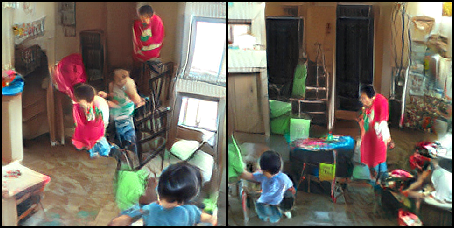

In [14]:
from PIL import Image

img = Image.open('samples/%s.png'%(name))
img